# Ejemplo de t-SNE (al problema del donut)

Este es un metodo **NO-LINEAL** para reducir las dimensiones de un dataset, de la misma forma que lo haría PCA (pero en este caso sería LINEAL).

- t viene porque se aplica una distribución t-student
- SNE es stochastic neighbor embedding

Tiene interes porque:
- Lo desarrollo G.Hinton (DeepLearning)
- Resulve ciertas limitaciones del PCA

Diferencias respecto de PCA:

- Es NO-LINEAL
- No transforma los datos, solo modifica la salida para minimizar la función de coste
- No hay datos de train/tests

Tutorial: https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

En el fondo hace una comparación de distribuciones de probabilidad utilizando la divergencia KL. Diremos que las 2 distribuciones son iguales cuando la divergencia KL es = 0. Esta expresión es la función de coste.

EL problema se resuelve como siempre, aplicamos Gradient Descent a la función de coste.


In [2]:
# Usaremos el t-SNE de sklearn

import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [3]:
def get_donut_data():
    N = 600                   # t-SNE no puede manejar grandes volumenes de datos
    R_inner = 10
    R_outer = 20

    # distancia desde el origen es el radio + random normal
    # el anguo theta se distribuye uniformemente entre (0, 2pi)
    R1 = np.random.randn(N/2) + R_inner
    theta = 2*np.pi*np.random.random(N/2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N/2) + R_outer
    theta = 2*np.pi*np.random.random(N/2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N/2) + [1]*(N/2))
    return X, Y

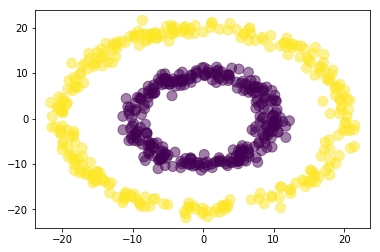

In [4]:
# Creamos los datos y los representamos
X, Y = get_donut_data()

# Los graficamos para ver que aspecto tienen
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()



### t-distributed Stochastic Neighbor Embedding (extracto de sklearn)

- t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.
- It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples

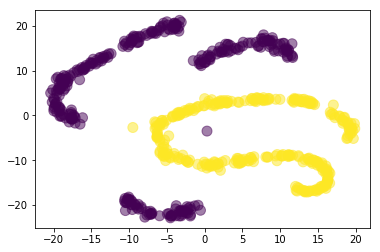

In [7]:
# Ahora simplmente creamos el modelo instanciando la clase 
# perplexity : float, optional (default: 30)
# The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. 
# The choice is not extremely critical since t-SNE is quite insensitive to this parameter. 

tsne = TSNE(perplexity=30)
Z = tsne.fit_transform(X)  # aqui es donde se entrena con los datos (pero no cambia los datos)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()